In [1]:
from src.scraping.get_data import *
from src.utils.checks import *
from src.portfolio.data_manipulation import *

In [2]:
download_data_updated()

File downloaded and renamed to MSCI_World.csv
File downloaded and renamed to MSCI_Europe_Small_Cap_Value_Weighted.csv
File downloaded and renamed to MSCI_Europe.csv
File downloaded and renamed to MSCI_ACWI.csv
File downloaded and renamed to S&P_500_Minimum_Volatility.csv
File downloaded and renamed to MSCI_Emerging_Markets.csv
File downloaded and renamed to FTSE_World_Government_Bond_Developed_Markets.csv
File downloaded and renamed to S&P_500.csv
File downloaded and renamed to MSCI_USA_Small_Cap_Value_Weighted.csv
File downloaded and renamed to MSCI_World_Momentum.csv


In [2]:
get_data_info()

,index_name,first_date_available,last_date_available
0,MSCI Europe Small Cap Value Weighted,11/1994,04/2025
1,MSCI Europe,12/1978,04/2025
2,MSCI World Momentum,06/1994,04/2025
3,MSCI ACWI,12/1987,04/2025
4,MSCI World,12/1978,04/2025
5,S&P 500 Minimum Volatility,12/1998,04/2025
6,MSCI Emerging Markets,12/1987,04/2025
7,FTSE World Government Bond - Developed Markets,01/1985,04/2025
8,S&P 500,02/1992,04/2025
9,MSCI USA Small Cap Value Weighted,11/1994,04/2025


In [6]:
data = get_data_updated_2025()

In [13]:
sum(portfolio.values())

100

In [20]:
portfolio = { 'MSCI ACWI'                                      : 80-16,
              'FTSE World Government Bond - Developed Markets' : 20,
              'MSCI World Momentum'                            : 8,
              'MSCI USA Small Cap Value Weighted'              : 5,
              'MSCI Europe Small Cap Value Weighted'           : 3,
            }

portfolio = { 'MSCI ACWI' : 100}

years = 20  # Number of years for the rolling window

ETFs    = list(portfolio.keys())
weights = list(portfolio.values())

data_selected = select_etfs(data, ETFs)
data_selected

,Date,MSCI ACWI
155,12/1987,10000.000000
156,01/1988,10362.212140
157,02/1988,11282.110059
158,03/1988,11476.420853
159,04/1988,11556.986830
...,...,...
599,12/2024,238077.880001
600,01/2025,245110.877561
601,02/2025,243528.409920
602,03/2025,225203.342503


In [38]:
import matplotlib.pyplot as plt

def plot_percentage_returns(data, start_date=None, end_date=None):
    # Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Apply filtering based on available limits right at the start
    if start_date:
        data = data[data['Date'] >= pd.to_datetime(start_date)]
    if end_date:
        data = data[data['Date'] <= pd.to_datetime(end_date)]

    # Drop the 'Date' column and calculate returns
    dates = data['Date']
    data = data.drop(columns=['Date'])
    data_returns = data.div(data.iloc[0]).subtract(0) *100

    # Create DataFrame with percentage returns
    df = pd.DataFrame(pd.concat([dates, data_returns], axis=1))

    # Set Date as index
    df.set_index("Date", inplace=True)

    # Plot
    plt.figure(figsize=(10, 5))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)

    plt.xlabel("Date")
    plt.ylabel("Return (%)")
    plt.title("Returns")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.yscale('log')

    plt.show()

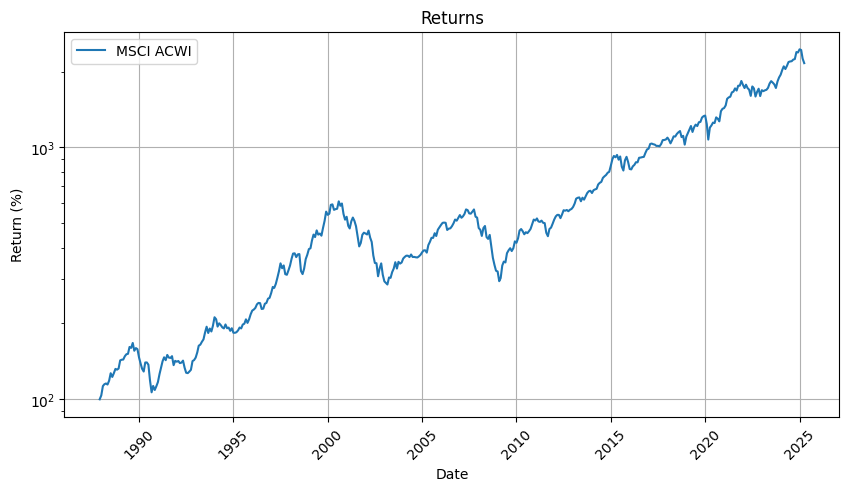

In [39]:
plot_percentage_returns(data_selected)